In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 27.5 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
def train_model(data_yaml, model_type='yolov8m-seg.pt', epochs=100):
    # Load a model
    model = YOLO(model_type)

    # Train the model
    results = model.train(data=data_yaml, epochs=epochs, imgsz=640)

    # Save the trained model
    model.save('trained_model.pt')

def process_photo(photo_path, model_path='trained_model.pt'):
    # Load the trained model
    model = YOLO(model_path)

    # Check if the file exists
    if not os.path.exists(photo_path):
        print(f"Error: File {photo_path} does not exist.")
        return None

    # Read the photo
    img = cv2.imread(photo_path)
    if img is None:
        print(f"Error: Unable to read the photo at {photo_path}.")
        return None

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_rgb)

    # Process results
    for r in results:
        boxes = r.boxes
        masks = r.masks

        # Draw bounding boxes and labels
        for box in boxes:
            b = box.xyxy[0].cpu().numpy().astype(int)
            cv2.rectangle(img_rgb, (b[0], b[1]), (b[2], b[3]), (0, 255, 0), 2)
            label = f"{r.names[int(box.cls)]} {box.conf.item():.2f}"
            cv2.putText(img_rgb, label, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Draw segmentation masks
        if masks is not None:
            for i, mask in enumerate(masks.data):
                mask = mask.cpu().numpy()
                mask = cv2.resize(mask, (img_rgb.shape[1], img_rgb.shape[0]))
                mask = (mask > 0.5).astype(np.uint8) * 255
                color = np.random.randint(0, 255, 3).tolist()
                img_rgb = cv2.addWeighted(img_rgb, 1, cv2.merge([mask * c for c in color]), 0.5, 0)

    return Image.fromarray(img_rgb)

# Train the model
train_model('/content/drive/MyDrive/Research Project/data.yaml')

100%|██████████| 52.4M/52.4M [00:00<00:00, 90.4MB/s]


Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/Research Project/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 24.7MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Research Project/images/train/labels... 1207 images, 16 backgrounds, 39 corrupt: 100%|██████████| 1207/1207 [08:20<00:00,  2.41it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Research Project/images/train/images/Captura-de-pantalla-2018-11-15-a-las-14-53-26-8th-copy-_png.rf.d9a32e6b32d18b255fb5746c285a80bd.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0532      1.1395]
train: WARNING ⚠️ /content/drive/MyDrive/Research Project/images/train/images/ants_0_3582_jpeg.rf.7bc19fd462decd212854a833ce358373.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2969      1.2323]
train: WARNING ⚠️ /content/drive/MyDrive/Research Project/images/train/images/ants_0_4755_jpeg.rf.a1c5c466343b9dc899c5d04b59e0d13c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2446]
train: WARNING ⚠️ /content/drive/MyDrive/Research Project/images/train/images/ants_0_6190_jpeg.rf.26dede178c069472a069b9e6a7974bef.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1538]
train: WARNING ⚠️ /content/drive/MyDr

train: New cache created: /content/drive/MyDrive/Research Project/images/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Research Project/images/valid/labels... 76 images, 1 backgrounds, 2 corrupt: 100%|██████████| 76/76 [01:06<00:00,  1.14it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Research Project/images/valid/images/es_spidersimage276_jpg.rf.613af57509b416d4191eb827e86ac535.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1002]
val: WARNING ⚠️ /content/drive/MyDrive/Research Project/images/valid/images/ticksimage406_jpg.rf.71695e30f972b2c2de6c6a58385e79e9.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2357]
val: New cache created: /content/drive/MyDrive/Research Project/images/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 92 weight(decay=0.0), 103 weight(decay=0.0005), 102 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.32G      1.964      3.061      3.861      1.617         96        640: 100%|██████████| 73/73 [01:03<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         74        296     0.0164       0.24     0.0893     0.0387     0.0166      0.238     0.0951     0.0416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.23G      1.922      2.601      2.925      1.634        131        640: 100%|██████████| 73/73 [00:59<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         74        296      0.591      0.136      0.165     0.0658      0.588      0.109      0.146     0.0589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.26G       1.94      2.596      2.839      1.623         64        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         74        296      0.438      0.142      0.112     0.0496      0.444      0.148       0.11     0.0439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.33G      1.915       2.54      2.736      1.643        100        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all         74        296      0.469      0.131      0.132     0.0684      0.447      0.156      0.125       0.06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.32G      1.922      2.596      2.544      1.583        107        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all         74        296      0.545      0.228      0.244      0.124       0.55      0.234      0.243      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.28G      1.887      2.539      2.449      1.587        146        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         74        296      0.416      0.249      0.214      0.104      0.596      0.178      0.216     0.0978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.36G      1.846      2.489      2.429      1.538         97        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         74        296      0.583      0.221      0.191     0.0952      0.583       0.22      0.193     0.0936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100       8.3G      1.836      2.499      2.413       1.59        134        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         74        296      0.445      0.274       0.26      0.141      0.461      0.279      0.266      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.41G       1.82      2.432      2.338      1.558        150        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         74        296      0.322      0.254       0.22      0.125      0.322      0.248      0.222      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.29G      1.824      2.454      2.287      1.548        129        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         74        296      0.603      0.266      0.213      0.105      0.603      0.268      0.221      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.34G       1.81      2.417      2.251      1.536         69        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         74        296       0.61      0.275      0.287      0.156      0.632      0.284      0.302      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.29G      1.794      2.391      2.197      1.524        149        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all         74        296      0.573      0.243      0.264      0.137      0.587      0.255      0.264      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.44G      1.774      2.395      2.172      1.516        113        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         74        296      0.647      0.324      0.308      0.173      0.655      0.329      0.313      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.14G      1.769      2.341      2.127      1.515         60        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         74        296      0.502      0.391      0.355      0.187      0.546      0.365      0.366      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.36G      1.758      2.359      2.123      1.507         84        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         74        296      0.515       0.26      0.278       0.16      0.528      0.257      0.281      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.38G      1.756      2.406      2.096      1.527        180        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         74        296      0.576      0.293      0.279      0.156      0.579      0.297      0.284      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.29G      1.727      2.304      2.101      1.507        103        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         74        296      0.595      0.313      0.321      0.178      0.608      0.306      0.325      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.21G      1.756      2.348      2.071      1.506         66        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         74        296      0.529      0.354      0.313      0.173      0.527      0.327      0.309      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.33G      1.725      2.261      2.051      1.494        145        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all         74        296      0.476      0.352      0.314      0.188      0.483       0.35      0.307      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.29G      1.744      2.319      2.007      1.488        103        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         74        296      0.413      0.396      0.395       0.23      0.417      0.373      0.389      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.39G      1.732      2.291          2      1.511        128        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all         74        296      0.502      0.373      0.376      0.207        0.5      0.368      0.374      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.13G      1.692      2.234      1.943      1.461         72        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         74        296      0.647      0.354      0.395      0.223      0.724      0.301      0.409       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.39G      1.691      2.251      1.928      1.453        121        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         74        296      0.452       0.44      0.353      0.193      0.463      0.443      0.356      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.26G      1.674      2.242      1.982      1.493        121        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         74        296       0.52      0.392      0.381      0.208      0.541      0.361      0.387      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.34G      1.701      2.231      1.916      1.453        100        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         74        296      0.719      0.292      0.423      0.245      0.724      0.297       0.42      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.37G      1.685      2.247      1.922      1.459        161        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         74        296      0.605      0.336      0.335      0.178      0.633       0.29      0.339      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.29G      1.702      2.262      1.894      1.457         78        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         74        296      0.388      0.516      0.388      0.209      0.537      0.404      0.397      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.24G      1.667      2.255      1.842       1.46         95        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all         74        296      0.318      0.488      0.376      0.211      0.315      0.494      0.381      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.24G      1.678      2.187      1.863      1.453        103        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         74        296      0.701       0.29      0.353      0.206      0.706      0.297      0.364      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.25G      1.662      2.209      1.834      1.447        103        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         74        296      0.499      0.378      0.384      0.212      0.509      0.381      0.368      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.36G      1.668      2.188      1.827      1.434        115        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         74        296      0.397       0.32      0.359      0.201      0.395      0.321       0.36      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.31G      1.639      2.141      1.777      1.437        127        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         74        296      0.483      0.416      0.423      0.231      0.473      0.404       0.42      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100       8.3G      1.623      2.144      1.744      1.428        101        640: 100%|██████████| 73/73 [00:58<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         74        296      0.406      0.405      0.426      0.239      0.506      0.334      0.424       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.24G       1.62      2.116      1.753      1.436         91        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         74        296       0.32      0.462      0.388       0.22      0.325      0.422       0.39      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.31G      1.648      2.146      1.792      1.447        153        640: 100%|██████████| 73/73 [00:58<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         74        296      0.533      0.387      0.465      0.263      0.527      0.389      0.457      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.28G      1.615      2.131      1.727      1.422         84        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         74        296      0.488      0.365      0.384      0.194      0.512      0.367      0.394      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.27G      1.607      2.125      1.708      1.413        143        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all         74        296      0.416      0.534      0.448      0.254      0.419       0.53      0.443       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.35G      1.593      2.066       1.72      1.414         82        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]

                   all         74        296      0.477      0.352      0.408      0.239       0.53      0.383       0.44      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.33G      1.584      2.096      1.668      1.402        134        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         74        296      0.323      0.471      0.404      0.224      0.325      0.439      0.406       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.27G      1.591      2.057      1.678      1.431        101        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         74        296      0.356      0.457      0.429      0.254      0.354      0.445      0.429      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.33G      1.565      2.089      1.631      1.411        138        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all         74        296      0.435      0.474      0.445      0.262      0.436      0.479      0.455      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.25G      1.553      2.048      1.624      1.389        172        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         74        296      0.349      0.504       0.42      0.233      0.367      0.522      0.433       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.13G      1.562      2.073      1.651      1.386         75        640: 100%|██████████| 73/73 [00:57<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         74        296      0.512      0.427       0.41       0.22        0.5      0.425      0.398      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.37G      1.564      2.084      1.613      1.383         72        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         74        296      0.335      0.427      0.393      0.223      0.353      0.408      0.409      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.38G      1.536       2.03       1.57      1.373         56        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         74        296      0.331      0.535       0.43      0.237       0.33      0.533      0.435      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.23G      1.559      2.032      1.576      1.391         86        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         74        296       0.42      0.424      0.425      0.252      0.423      0.429      0.432       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100       8.2G      1.551      2.025      1.568      1.389        133        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         74        296      0.426      0.411      0.434      0.238      0.441      0.412       0.44      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.34G      1.518       1.99      1.519      1.361        109        640: 100%|██████████| 73/73 [00:58<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all         74        296      0.448      0.413       0.46      0.258      0.418      0.405      0.442      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.42G      1.519      1.995      1.489      1.358        108        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         74        296      0.503      0.418      0.452      0.262      0.504      0.419      0.448      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.23G      1.498      1.956      1.499      1.362         52        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         74        296      0.488      0.497       0.47      0.282      0.555      0.437      0.472      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.28G      1.532      1.956      1.524      1.388        108        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         74        296      0.381      0.447      0.422      0.225      0.375      0.437      0.415      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.44G      1.491      1.933      1.453      1.347        236        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         74        296      0.389      0.432      0.455      0.253      0.391      0.431      0.466      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.36G      1.511       1.96       1.47      1.348         93        640: 100%|██████████| 73/73 [00:58<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         74        296      0.448      0.387      0.449      0.224      0.461      0.397      0.452      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.21G      1.486       1.93      1.424      1.337        131        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         74        296      0.449      0.453      0.469      0.247      0.464      0.474      0.478      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.31G      1.479      1.952      1.387      1.325         99        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         74        296      0.472      0.413      0.486      0.272      0.512      0.398      0.479      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.36G       1.46      1.921      1.414      1.337        114        640: 100%|██████████| 73/73 [00:57<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         74        296      0.358      0.508      0.433      0.256      0.611      0.395      0.452       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.38G      1.468      1.894      1.395      1.339        103        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         74        296      0.497      0.458      0.478      0.291      0.527       0.45      0.485      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.16G      1.472      1.923      1.399      1.334        166        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all         74        296      0.578      0.431      0.462      0.256      0.583      0.432      0.466      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.34G      1.454      1.863       1.33       1.29        131        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         74        296      0.469      0.473      0.468      0.274      0.459      0.457      0.467      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.45G      1.444      1.906      1.358      1.312        129        640: 100%|██████████| 73/73 [00:57<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         74        296      0.391      0.448      0.438      0.258      0.594      0.354      0.452      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.38G      1.424      1.866      1.333      1.317        172        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         74        296      0.509      0.416      0.471      0.259      0.496      0.408      0.464      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.21G      1.435      1.865      1.293      1.301        114        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         74        296      0.534      0.535      0.538      0.323      0.508      0.492      0.518      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.36G      1.431      1.849      1.316      1.291         86        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         74        296      0.416      0.465      0.438      0.269      0.408      0.457      0.436      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.33G      1.392      1.799      1.292      1.297         90        640: 100%|██████████| 73/73 [00:57<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         74        296      0.475       0.55      0.504       0.28      0.441      0.516      0.478      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.37G      1.392      1.828      1.271      1.283         85        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         74        296      0.516      0.476      0.497      0.287       0.53      0.492      0.509      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.32G      1.381       1.79      1.231      1.279        130        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         74        296       0.52      0.511       0.48      0.284      0.492      0.509      0.486      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.26G      1.401      1.798      1.263      1.288        113        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         74        296      0.502      0.473      0.496      0.293      0.488       0.48      0.498      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.46G      1.387      1.817      1.224      1.293        118        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         74        296      0.489       0.53      0.519      0.309      0.539      0.514       0.53      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.36G      1.356      1.771      1.206      1.274        137        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         74        296      0.528      0.466      0.432      0.254      0.565      0.479      0.459      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100       8.2G      1.359      1.735      1.199      1.265        118        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         74        296      0.616      0.528       0.56      0.337      0.604      0.538      0.576      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.28G      1.348      1.761      1.178      1.261         90        640: 100%|██████████| 73/73 [00:59<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         74        296      0.514      0.478      0.501      0.284      0.606      0.428      0.518       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.34G      1.339      1.743      1.167       1.25        123        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         74        296      0.469       0.52      0.485      0.299      0.477      0.534       0.49       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.38G      1.336      1.753      1.145      1.243         71        640: 100%|██████████| 73/73 [00:59<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         74        296      0.578      0.471      0.509      0.282      0.559      0.461      0.479      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100       8.5G      1.326      1.726      1.135      1.244        128        640: 100%|██████████| 73/73 [00:58<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         74        296      0.502      0.563      0.538      0.307      0.513      0.573      0.543      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.31G       1.31      1.716      1.103       1.24         93        640: 100%|██████████| 73/73 [00:58<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         74        296      0.492      0.609      0.553       0.31      0.497      0.604      0.535      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.28G      1.305       1.69      1.117       1.24        125        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         74        296      0.555      0.566      0.547      0.326      0.545       0.57      0.546      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.34G      1.288      1.685       1.09      1.233        179        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         74        296       0.52      0.487      0.527      0.296      0.501      0.512      0.514      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.21G      1.277      1.675      1.077      1.214        101        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all         74        296      0.533      0.548       0.55      0.306      0.496       0.52      0.511      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.29G      1.276      1.664      1.052      1.216        115        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         74        296      0.538      0.529      0.554      0.321      0.524      0.523       0.54        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.39G      1.263      1.676      1.056       1.23         70        640: 100%|██████████| 73/73 [00:57<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         74        296      0.636      0.535      0.559      0.301      0.635      0.514      0.556      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.33G      1.276      1.676       1.05      1.209        106        640: 100%|██████████| 73/73 [00:58<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         74        296      0.574      0.533      0.567      0.332      0.571      0.528      0.553      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.23G      1.249      1.646      1.024      1.211        112        640: 100%|██████████| 73/73 [00:57<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         74        296      0.499       0.45      0.474      0.283      0.515      0.463      0.482      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.35G      1.251       1.64      1.048       1.21        154        640: 100%|██████████| 73/73 [00:57<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all         74        296      0.503       0.52       0.54      0.296      0.581      0.477      0.536       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.23G      1.258      1.655      1.017      1.203         73        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         74        296      0.457      0.588      0.519      0.287      0.463      0.597      0.527      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.45G      1.247      1.616      1.008      1.206        122        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         74        296      0.508      0.519      0.504      0.286      0.522      0.527      0.517      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.16G      1.242      1.643      0.995      1.195        147        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         74        296      0.517      0.493      0.495      0.285      0.514      0.505      0.499      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.28G      1.199      1.592      0.964      1.168         87        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all         74        296      0.514      0.515      0.519      0.295      0.519      0.526      0.531      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.36G      1.202      1.554     0.9599      1.173        180        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         74        296      0.535      0.461      0.526        0.3       0.55       0.48       0.54      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.34G      1.165      1.545     0.9291      1.172        124        640: 100%|██████████| 73/73 [00:57<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         74        296      0.515      0.494      0.495      0.299      0.525        0.5      0.515      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.37G      1.168      1.552     0.9322      1.172        105        640: 100%|██████████| 73/73 [00:57<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         74        296      0.458      0.588      0.529        0.3      0.472      0.591      0.538      0.301


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.24G      1.223        1.6     0.8986      1.228         60        640: 100%|██████████| 73/73 [00:56<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         74        296      0.519      0.498      0.541      0.316      0.452      0.558      0.532      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.32G      1.183      1.518     0.8539      1.201         40        640: 100%|██████████| 73/73 [00:54<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         74        296      0.575      0.594      0.573      0.338      0.577      0.604      0.566      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.23G       1.19      1.582     0.8501        1.2         54        640: 100%|██████████| 73/73 [00:54<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         74        296      0.572      0.542      0.558      0.329      0.584      0.564      0.582      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.19G      1.172      1.555     0.8246      1.174         67        640: 100%|██████████| 73/73 [00:54<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         74        296      0.617      0.493       0.54      0.309      0.623      0.503      0.538      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.25G      1.138      1.508     0.7933      1.168         84        640: 100%|██████████| 73/73 [00:54<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         74        296      0.642      0.507      0.557      0.319      0.629      0.507      0.546      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.26G       1.14      1.512     0.7938      1.164         87        640: 100%|██████████| 73/73 [00:54<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all         74        296      0.608       0.51      0.557      0.323      0.613      0.522      0.561      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.22G      1.125      1.506     0.8014      1.158         48        640: 100%|██████████| 73/73 [00:55<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         74        296      0.596      0.529      0.567      0.328      0.593      0.528      0.576      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.35G      1.121      1.504     0.7903      1.155         59        640: 100%|██████████| 73/73 [00:54<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         74        296      0.563      0.516      0.555      0.326      0.563      0.522      0.566      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.33G      1.133      1.511      0.788       1.15         61        640: 100%|██████████| 73/73 [00:55<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         74        296      0.572      0.532      0.546      0.323       0.58      0.562      0.575      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100       8.3G      1.096      1.475     0.7698      1.149        121        640: 100%|██████████| 73/73 [00:54<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         74        296      0.613      0.506      0.557      0.323      0.603      0.511      0.564      0.314



100 epochs completed in 1.704 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 49.6MB
Optimizer stripped from runs/segment/train/weights/best.pt, 49.6MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 263 layers, 24,591,246 parameters, 0 gradients, 98.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]


                   all         74        296      0.619      0.529      0.561      0.337      0.603      0.538      0.577      0.333
                  Ants          9         70       0.58      0.343      0.416       0.16      0.631      0.429      0.499      0.155
              Bed Bugs          2         27      0.848      0.296      0.428      0.151      0.933      0.333       0.48      0.135
              Chiggers          2         20      0.236       0.05     0.0848     0.0279          0          0     0.0492     0.0127
                 Fleas         15        132       0.66      0.659      0.614      0.267      0.656      0.674      0.675      0.261
            Goosebumps          7          7      0.948      0.714      0.933      0.902      0.942      0.714      0.933      0.902
              Mosquito          9         11      0.724      0.636      0.726       0.41      0.718      0.636       0.71      0.394
              Reupload          3          3      0.386      0.667   

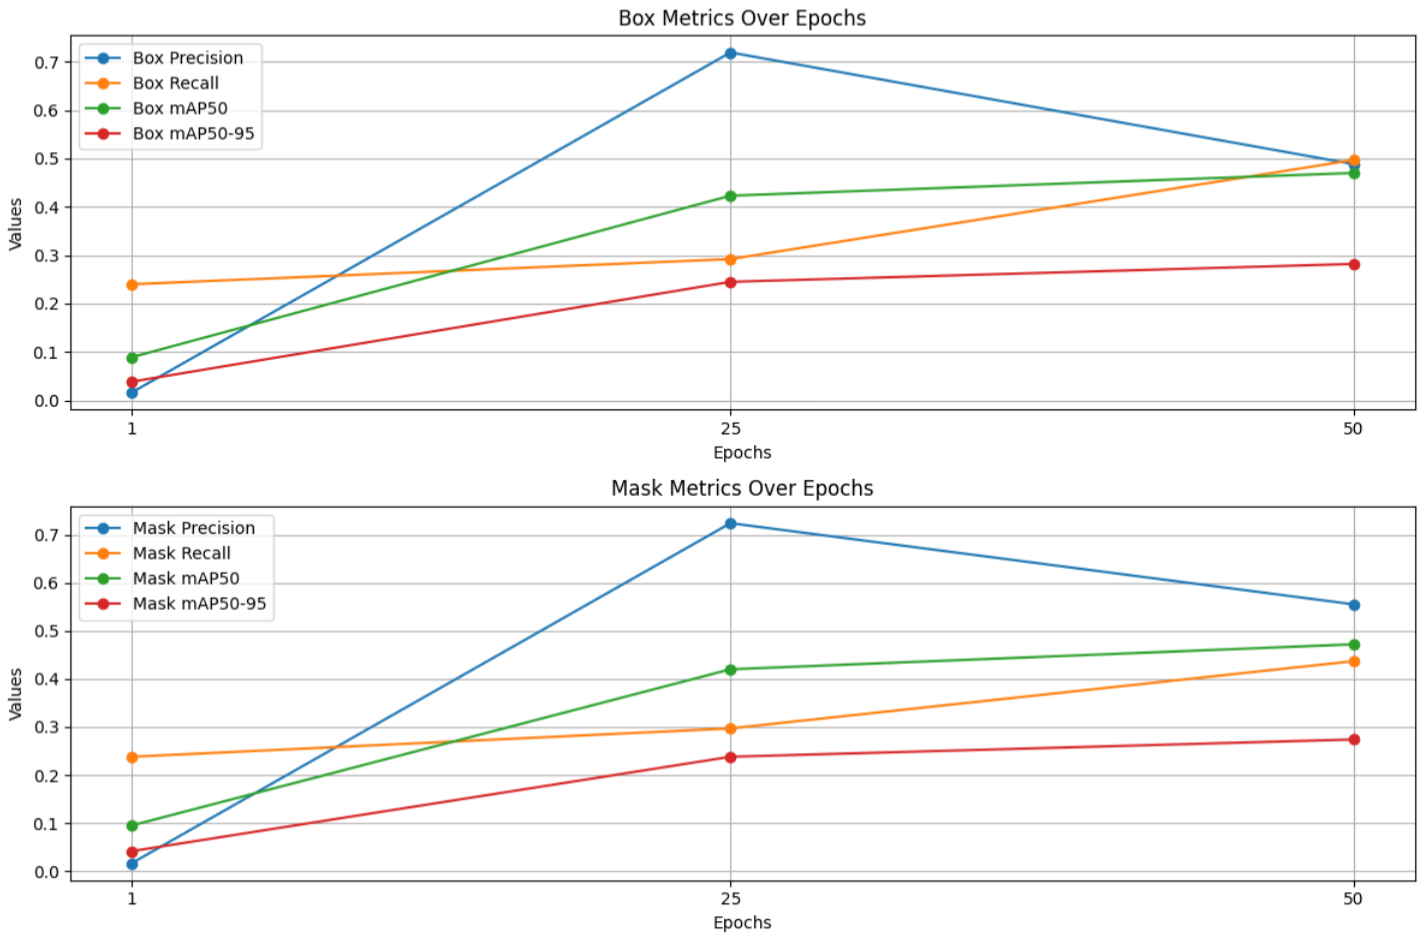

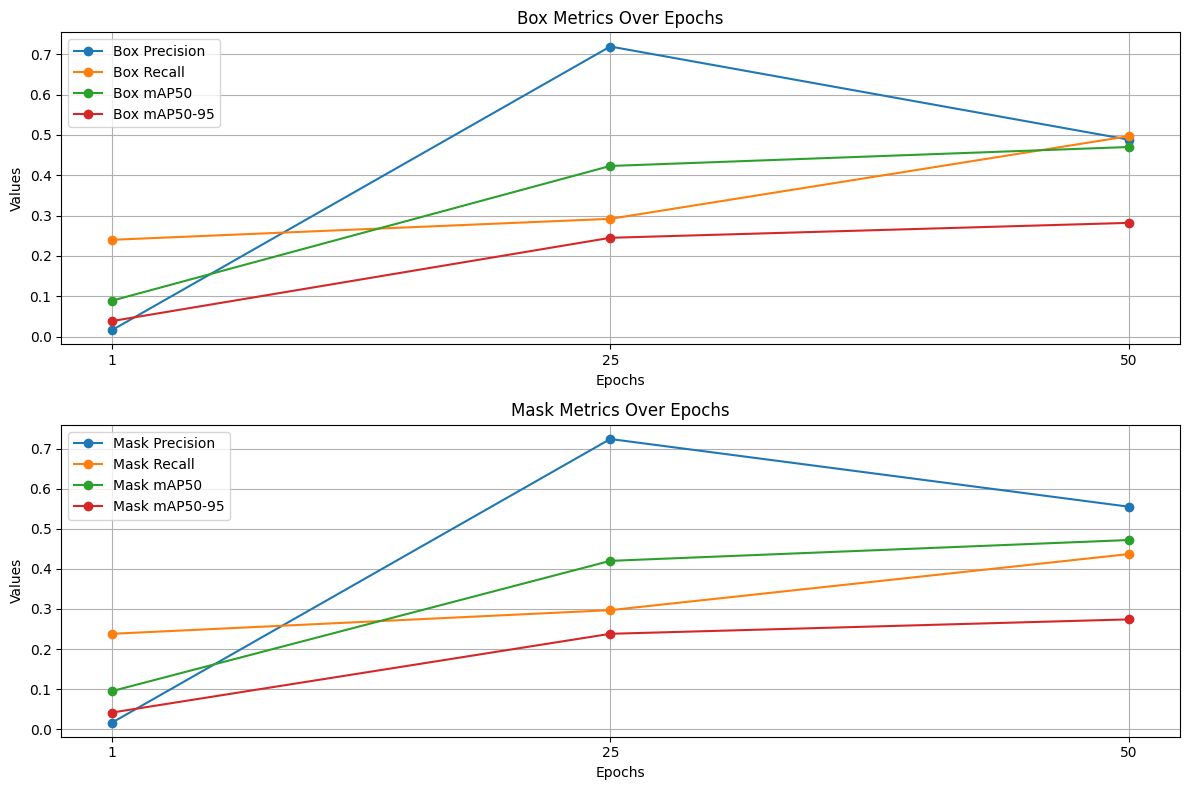

In [14]:
# Process a photo using the trained model
photo_path = '/content/drive/MyDrive/Research Project/images/test/images/es_spidersimage97_jpg.rf.d0ab8c52585231691bcb19a2783b64a0.jpg'
result_image = process_photo(photo_path)
if result_image:
    result_image.show()


0: 416x640 (no detections), 86.5ms
Speed: 2.3ms preprocess, 86.5ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
